## Importing data and soritng according to need
1.get data from csv file
2.get total quantites per year of petrochemical compound imports (Quantities are in 10<sup>3</sup> Metric ton
3.get toal value per year of petrochemical coumpound imports
4.calculate basic statisics for total_quantity_per_year and total_value_per_year data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_csv('Grouped_Imports_by_Group_All_Years.csv')

# Get all QTY and VAL columns
qty_cols = [col for col in df.columns if 'QTY' in col]
val_cols = [col for col in df.columns if 'VAL' in col]

# Calculate totals
total_qty_per_year = df[qty_cols].sum(axis=0).values
total_val_per_year = df[val_cols].sum(axis=0).values

# Section 1: Basic Statistics
print("Total QTY per year:", total_qty_per_year)
print("Total VAL per year:", total_val_per_year)
print("\nQTY Stats - Mean: %.2f, Std: %.2f" % (total_qty_per_year.mean(), total_qty_per_year.std()))
print("VAL Stats - Mean: %.2f, Std: %.2f" % (total_val_per_year.mean(), total_val_per_year.std()))

/home/sumitgarad/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Total QTY per year: [10704.84  11665.712 12128.783 12843.131 12356.03  12222.311 10210.873
 11731.702]
Total VAL per year: [ 8844.609  8170.211  8523.103  9495.959 10825.921  9101.336  7159.554
 12009.342]

QTY Stats - Mean: 11732.92, Std: 821.21
VAL Stats - Mean: 9266.25, Std: 1432.07


## Ploting histogram for visual representation of data
1.Quatity v/s frequency graph
2.Value v/s frequency graph

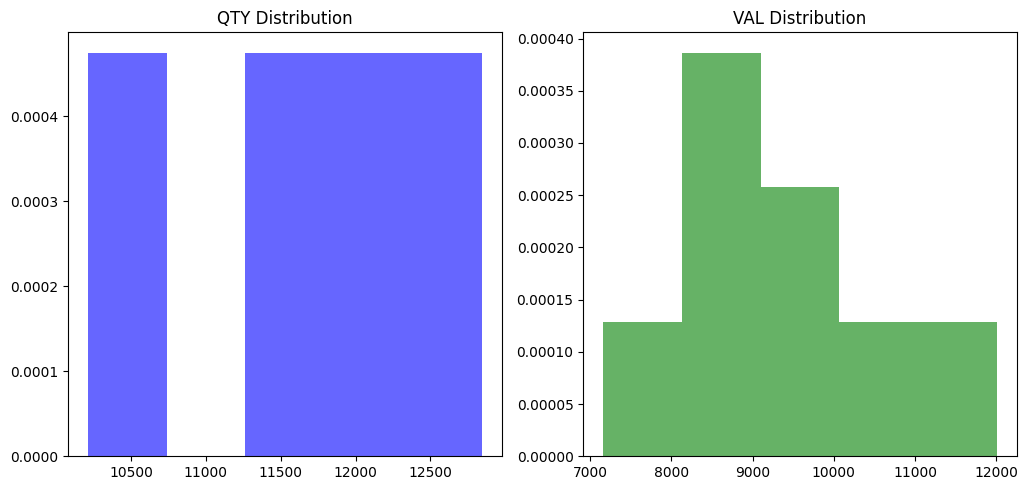

In [2]:
plt.figure(figsize=(15, 5))


# Histograms
plt.subplot(1, 3, 2)
plt.hist(total_qty_per_year, bins=5, density=True, alpha=0.6, color='blue')
plt.title("QTY Distribution")
plt.subplot(1, 3, 3)
plt.hist(total_val_per_year, bins=5, density=True, alpha=0.6, color='green')
plt.title("VAL Distribution")
plt.tight_layout()
plt.show()

## QQ Plot test for normality
a scatterplot created by plotting quantiles against values
if the data points are forming almost a 45 degree line with x axis then dataset follows almost normal distribution

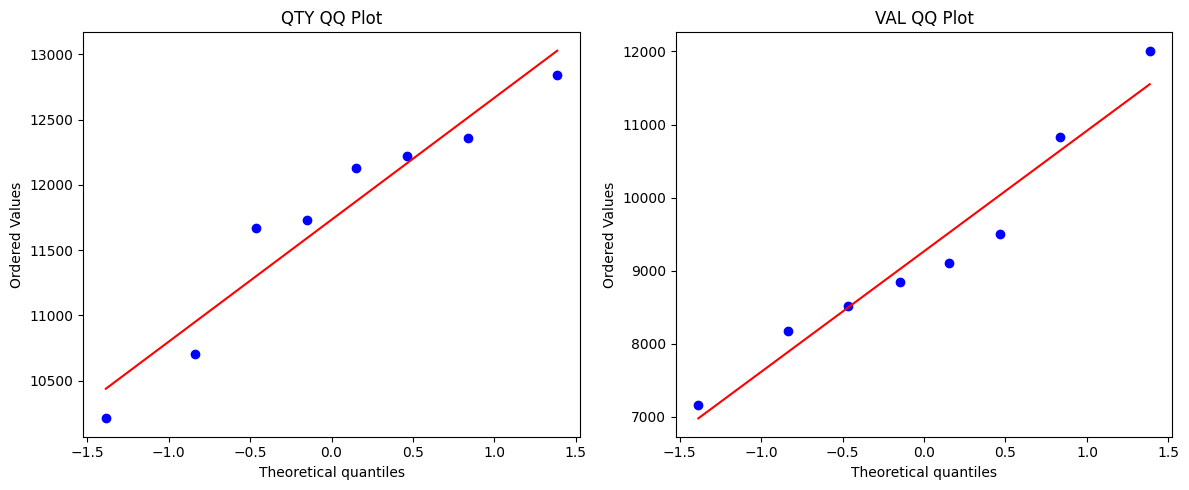

In [3]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(total_qty_per_year, dist="norm", plot=plt)
plt.title("QTY QQ Plot")
plt.subplot(1, 2, 2)
stats.probplot(total_val_per_year, dist="norm", plot=plt)
plt.title("VAL QQ Plot")
plt.tight_layout()
plt.show()


## Shapiro-Wilk test 
for testing normality of data.
-> p-value for Quantity is 0.478 therefor A normal distribution is a plausible fit for the total yearly QTY.
-> p-value for Value is 0.766 strongly suggesting normal distribution is reasonable fit for values

In [4]:
print("\nNormality Tests (small sample - interpret with caution):")
print("QTY - Shapiro-Wilk p-value: %.3f" % stats.shapiro(total_qty_per_year)[1])
print("VAL - Shapiro-Wilk p-value: %.3f" % stats.shapiro(total_val_per_year)[1])



Normality Tests (small sample - interpret with caution):
QTY - Shapiro-Wilk p-value: 0.478
VAL - Shapiro-Wilk p-value: 0.766


## analysing other distribution tests
Quantity :
        Gamma (p = 0.712) Good fit (p > 0.05). The gamma distribution cannot be rejected.
        Normal (p = 0.772) Slightly better fit than gamma (higher p-value).
        Exponential (p = 0.183) Poorer fit compared to gamma/normal 
Values : 
    Gamma (p = 0.997) Near-perfect fit (p ≈ 1.0). The data aligns almost perfectly with a gamma distribution.
    Normal (p = 0.900) Also a very good fit, but slightly worse than gamma.
    Exponential (p = 0.585) Not as good as gamma/normal, but still acceptable (p > 0.05).

In [5]:
distributions = {
    'gamma': ('gamma', stats.gamma),
    'normal': ('norm', stats.norm),
    'exponential': ('expon', stats.expon),
    # 'beta': ('beta', stats.beta)  # Uncomment if needed
}

def test_distributions(data, data_name):
    print(f"\nTesting distributions for {data_name}:")
    for dist_name, (scipy_name, dist_func) in distributions.items():
        try:

                params = dist_func.fit(data)
                ks_stat, p_value = stats.kstest(data, scipy_name, args=params)
                print(f"{dist_name}: KS Stat={ks_stat:.3f}, p-value={p_value:.3f}")
        except Exception as e:
            print(f"Failed to fit {dist_name}: {str(e)}")

test_distributions(total_qty_per_year, "Total QTY")
test_distributions(total_val_per_year, "Total VAL")


Testing distributions for Total QTY:
gamma: KS Stat=0.230, p-value=0.712
normal: KS Stat=0.217, p-value=0.772
exponential: KS Stat=0.366, p-value=0.183

Testing distributions for Total VAL:
gamma: KS Stat=0.127, p-value=0.997
normal: KS Stat=0.186, p-value=0.900
exponential: KS Stat=0.256, p-value=0.585


## Fitting Plots

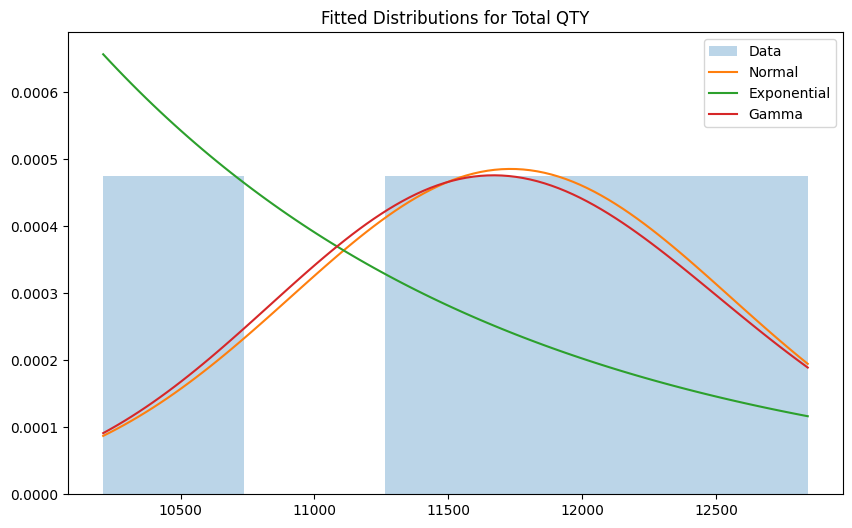

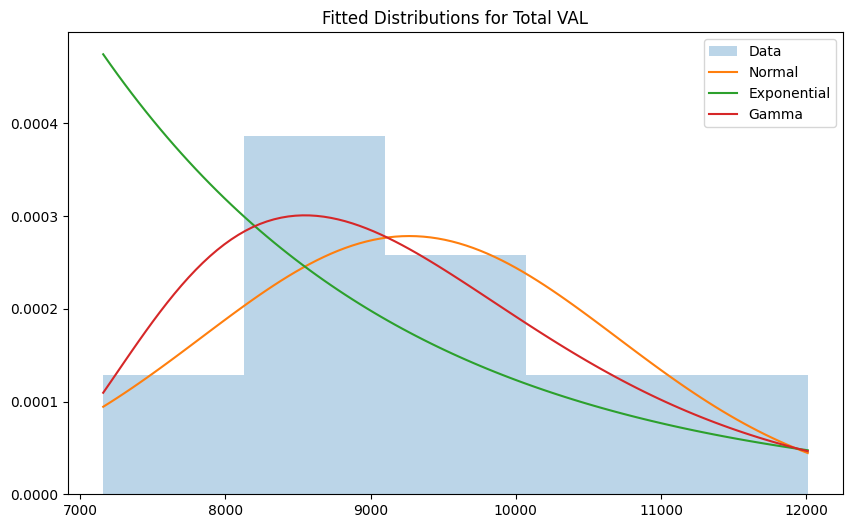

In [6]:
def plot_fitted_distributions(data, data_name):
    plt.figure(figsize=(10, 6))
    x = np.linspace(min(data), max(data), 100)
    
    # Plot histogram
    plt.hist(data, bins=5, density=True, alpha=0.3, label='Data')
    
    # Fit and plot each distribution
    dists = {
        'Normal': stats.norm,
        'Exponential': stats.expon,
        'Gamma': stats.gamma,
    }
    
    for name, dist in dists.items():
        try:
            params = dist.fit(data)
            pdf = dist.pdf(x, *params)
            plt.plot(x, pdf, label=name)
        except:
            continue
    
    plt.title(f"Fitted Distributions for {data_name}")
    plt.legend()
    plt.show()

plot_fitted_distributions(total_qty_per_year, "Total QTY")
plot_fitted_distributions(total_val_per_year, "Total VAL")